In [296]:
# Loading the libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import datetime
from datetime import datetime
import statsmodels.api as sm
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import pickle


In [297]:
# Loading the data used
df = pd.read_parquet("yellow_tripdata_2024-08.parquet")
#Link: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

# Show the first few rows
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2024-08-01 00:21:00,2024-08-01 00:36:13,1.00,7.40,1.00,N,138,80,1,28.90,7.75,0.50,7.65,0.00,1.00,45.80,0.00,1.75
1,2,2024-08-01 00:20:01,2024-08-01 00:41:47,1.00,9.91,1.00,N,138,239,1,40.80,6.00,0.50,11.55,6.94,1.00,71.04,2.50,1.75
2,1,2024-08-01 00:17:52,2024-08-01 00:41:45,0.00,13.40,1.00,N,138,88,1,52.00,10.25,0.50,15.00,0.00,1.00,78.75,2.50,1.75
3,1,2024-08-01 00:49:08,2024-08-01 00:55:56,0.00,3.90,1.00,N,209,137,3,17.00,3.50,0.50,0.00,0.00,1.00,22.00,2.50,0.00
4,1,2024-08-01 00:38:52,2024-08-01 00:42:34,1.00,0.40,1.00,N,148,144,2,5.10,3.50,0.50,0.00,0.00,1.00,10.10,2.50,0.00


In [298]:
# Set pandas to display numbers without scientific notation
pd.set_option('display.float_format', '{:,.2f}'.format)

# Describing the DataFrame:
df.describe()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,"2,979,183.00",2979183,2979183,"2,720,516.00","2,979,183.00","2,720,516.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,979,183.00","2,720,516.00","2,720,516.00"
mean,1.77,2024-08-16 04:42:38.574033,2024-08-16 05:00:00.420092,1.36,4.94,2.69,161.88,161.16,1.15,19.72,1.39,0.48,3.26,0.61,0.95,28.27,2.17,0.17
min,1.00,2009-01-01 00:02:52,2009-01-01 20:28:16,0.00,0.00,1.00,1.00,1.00,0.00,"-1,174.10",-7.50,-0.50,-90.00,-116.70,-1.00,"-1,000.00",-2.50,-1.75
25%,2.00,2024-08-07 22:52:49,2024-08-07 23:08:25.500000,1.00,1.03,1.00,132.00,112.00,1.00,9.30,0.00,0.50,0.00,0.00,1.00,15.60,2.50,0.00
50%,2.00,2024-08-15 21:29:52,2024-08-15 21:45:18,1.00,1.80,1.00,161.00,162.00,1.00,13.50,1.00,0.50,2.52,0.00,1.00,20.93,2.50,0.00
75%,2.00,2024-08-23 23:51:11.500000,2024-08-24 00:07:24.500000,1.00,3.60,1.00,231.00,233.00,1.00,22.60,2.50,0.50,4.20,0.00,1.00,30.79,2.50,0.00
max,2.00,2024-09-10 12:27:29,2024-09-10 19:45:57,9.00,"327,025.19",99.00,265.00,265.00,4.00,"1,386.20",14.25,10.50,523.95,131.00,1.00,"1,404.83",2.50,1.75
std,0.42,NaN,NaN,0.84,378.53,12.37,63.90,69.77,0.68,21.02,1.84,0.14,4.21,2.35,0.29,25.80,0.95,0.54


**Data Cleaning**

In [299]:
# Count zero values in each column
zero_counts = (df == 0).sum()

# Display the results
print("Zero values in each column:")
print(zero_counts)

Zero values in each column:
VendorID                       0
tpep_pickup_datetime           0
tpep_dropoff_datetime          0
passenger_count            26267
trip_distance              57413
RatecodeID                     0
store_and_fwd_flag             0
PULocationID                   0
DOLocationID                   0
payment_type              258667
fare_amount                 1135
extra                    1372438
mta_tax                    44111
tip_amount                919075
tolls_amount             2730265
improvement_surcharge      39653
total_amount                 397
congestion_surcharge      271028
Airport_fee              2432125
dtype: int64


**Remove unnecessary columns**

In [300]:
#drop airport fee, toll amount and extra
df = df.drop(['VendorID','store_and_fwd_flag', 'extra','mta_tax','tip_amount','tolls_amount','improvement_surcharge','total_amount','congestion_surcharge','Airport_fee'], axis=1)

Description

**VendorID**                       

A code indicating the TPEP provider that provided the record.
1 = Creative Mobile Technologies, LLC
2 = Curb Mobility, LLC

Curb Mobility, LLC (formerly Creative Mobile Technologies, LLC) operates the Curb app, which connects users to traditional taxi services and provides a way to pay for rides. The fares on Curb are set by the local taxi companies and for-hire vehicle operators, so pricing can vary based on location. Curb may also add a small fee for using the app. While Curb's fares are generally considered to be less expensive than Uber and Lyft in some areas, they may have longer wait times and limited availability in some locations



**store_and_fwd_flag**

This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y = store and forward trip N = not a store and forward trip

**Below values are removed as these are extra charges outside of base fare amount**



extra

mta_tax

tip_amount

tolls_amount

improvement_surcharge

total_amount

congestion_surcharge

Airport fee

In [301]:
#check how many rows under payment type has 3 or 4 values as we only want to predict fares with legitimate transactions and revenue generating trips
#3 = No charge
#4 = Dispute
print(df[df['payment_type'].isin([3, 4])].shape[0])


94620


In [302]:
#remove records with 3 or 4 payment type
df = df[~df['payment_type'].isin([3, 4])]


In [303]:
#check how many negative values under fare_amount
print(df[df['fare_amount'] <=0].shape[0])

18818


In [304]:
#remove fare amount with negative values
df = df[df['fare_amount'] >= 0]

**Missing values**

In [305]:
#Checking the missing values
df.isnull().sum()

,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
passenger_count,253000
trip_distance,0
RatecodeID,253000
PULocationID,0
DOLocationID,0
payment_type,0
fare_amount,0


**Understanding the Missing Values:**
* passenger_count: Missing values in this column may represent trips with no passengers or incomplete data. *Fill with Mode (likely 1.0)*

* RatecodeID: The final rate code in effect at the end of the trip. 1 = Standard rate 2 = JFK 3 = Newark 4 = Nassau or Westchester 5 = Negotiated fare 6 = Group ride 99 = Null/unknown. *Fill with 99 ("Unknown")*


In [306]:
df.dtypes

,0
tpep_pickup_datetime,datetime64[us]
tpep_dropoff_datetime,datetime64[us]
passenger_count,float64
trip_distance,float64
RatecodeID,float64
PULocationID,int32
DOLocationID,int32
payment_type,int64
fare_amount,float64


In [307]:
#impute missing numerical features using median
df['passenger_count'].fillna(df['passenger_count'].median(), inplace=True)
df['RatecodeID'].fillna(df['RatecodeID'].median(), inplace=True)

#replace 0 with median values for passenger
df['passenger_count'].replace(0, df['passenger_count'].median(), inplace=True)
df['trip_distance'].replace(0, df['trip_distance'].median(), inplace=True)

#replace 0 payment type with mode values
df['payment_type'].replace(0, df['payment_type'].mode()[0], inplace=True)

In [308]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount
count,2866464,2866464,"2,866,464.00","2,866,464.00","2,866,464.00","2,866,464.00","2,866,464.00","2,866,464.00","2,866,464.00"
mean,2024-08-16 04:18:31.615063,2024-08-16 04:35:59.015849,1.33,5.00,2.59,162.08,161.36,1.15,20.53
min,2009-01-01 00:02:52,2009-01-01 20:28:16,1.00,0.01,1.00,1.00,1.00,1.00,0.00
25%,2024-08-07 22:32:31,2024-08-07 22:48:56,1.00,1.10,1.00,132.00,113.00,1.00,9.30
50%,2024-08-15 21:01:00,2024-08-15 21:17:05.500000,1.00,1.81,1.00,161.00,162.00,1.00,14.20
75%,2024-08-23 23:27:40,2024-08-23 23:43:41.500000,1.00,3.60,1.00,231.00,233.00,1.00,23.30
max,2024-09-10 12:27:29,2024-09-10 19:45:57,9.00,"327,025.19",99.00,265.00,265.00,2.00,"1,386.20"
std,NaN,NaN,0.80,384.34,12.03,63.99,69.73,0.36,19.61


In [309]:
#check 0 values in fare amount
df[df['fare_amount'] == 0].shape[0]

719

In [310]:
#remove rows with 0 amount in fare amount
df = df[df['fare_amount'] != 0]

In [311]:
df.describe()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount
count,2865745,2865745,"2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00"
mean,2024-08-16 04:18:28.588075,2024-08-16 04:35:56.111618,1.33,5.00,2.59,162.08,161.36,1.15,20.53
min,2009-01-01 00:02:52,2009-01-01 20:28:16,1.00,0.01,1.00,1.00,1.00,1.00,0.01
25%,2024-08-07 22:32:32,2024-08-07 22:48:57,1.00,1.10,1.00,132.00,113.00,1.00,9.30
50%,2024-08-15 21:00:50,2024-08-15 21:16:55,1.00,1.81,1.00,161.00,162.00,1.00,14.20
75%,2024-08-23 23:27:41,2024-08-23 23:43:43,1.00,3.60,1.00,231.00,233.00,1.00,23.30
max,2024-09-10 12:27:29,2024-09-10 19:45:57,9.00,"327,025.19",99.00,265.00,265.00,2.00,"1,386.20"
std,NaN,NaN,0.80,384.39,12.02,63.99,69.73,0.36,19.61


In [312]:
df.shape

(2865745, 9)

**Unique values**

In [313]:
# For categorical-like columns
columns_to_check = ['passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID',
                    'payment_type']

for col in columns_to_check:
    print(f"{col} unique values:\n", df[col].unique(), "\n")

passenger_count unique values:
 [1. 2. 5. 3. 4. 6. 7. 8. 9.] 

RatecodeID unique values:
 [ 1.  2.  5. 99.  4.  3.  6.] 

PULocationID unique values:
 [138 148 211 170 239 164  48  79 107 163  87 231 209 142 234 113 230  68
 132 161 144 249 262 125 162  70 181  90 236 233 100 237 246 143 229 166
 186 114 158 263 264 141 140 255  43  97  88  25 238  42 223 265 261  93
 130 152  82 137  74  50   4   7  41  45 145  75  80  24 168 232 224 151
 155  92 219  39 146 259 256 157 116 254 260 134  69 196 192 198 179  14
  83  37  91 213  95 102 226 244 129 216  86 201  72  59  52 203 218   3
 193 182  89  73 205  10 191 139 197  64  61 123  55  98 242  38  11 177
  20 225 212  51 250 215 121   1 167  65 169  17  33 147  13 207 200  77
  85 122  35  40 222  76  63 149 247 159  21 108 188 124  29 131  62 241
  71  47 235 258 117 243  18 101  66  49 174 136   9 119 126 210 154 195
 135  36 189 257 165  22  28  56 180  26 208 227  15 171 173  78 220 175
  81 194 150 248  94 217 185 133 153 228 202 1

**Remove Duplicates:**

In [314]:
# Check for duplicate rows
df.duplicated().sum()

np.int64(0)

**Datetime Feature Engineering:**

In [315]:
#add feature total trip time
df['total_trip_time'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()


In [316]:
# If you filtered your data earlier, make sure to use .copy() to avoid warning
# Example: if df = original_df[original_df['fare_amount'] > 0]
df = df.copy()

# Extract useful features from datetime
df.loc[:, 'pickup_hour'] = df['tpep_pickup_datetime'].dt.hour              # Hour of pickup
df.loc[:, 'pickup_dayofweek'] = df['tpep_pickup_datetime'].dt.dayofweek    # 0 = Monday, 6 = Sunday
df.loc[:, 'dropoff_hour'] = df['tpep_dropoff_datetime'].dt.hour            # Hour of dropoff

In [317]:
mask = df['total_trip_time'] <= 0

# Attempt fix: swap pickup and dropoff times if trip_time is negative
df.loc[mask, ['tpep_pickup_datetime', 'tpep_dropoff_datetime']] = df.loc[mask, ['tpep_dropoff_datetime', 'tpep_pickup_datetime']].values

# Recalculate trip time
df['total_trip_time'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds()

**Remove Irrelevant Columns**

In [318]:
# Drop irrelevant columns
df = df.drop(['tpep_pickup_datetime', 'tpep_dropoff_datetime'], axis=1)

# Verify the remaining columns
print(df.columns)

Index(['passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'total_trip_time',
       'pickup_hour', 'pickup_dayofweek', 'dropoff_hour'],
      dtype='object')


In [319]:
df.describe()

,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,total_trip_time,pickup_hour,pickup_dayofweek,dropoff_hour
count,"2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00","2,865,745.00"
mean,1.33,5.00,2.59,162.08,161.36,1.15,20.53,"1,047.53",14.23,3.07,14.29
std,0.80,384.39,12.02,63.99,69.73,0.36,19.61,"2,158.75",5.79,1.88,5.90
min,1.00,0.01,1.00,1.00,1.00,1.00,0.01,0.00,0.00,0.00,0.00
25%,1.00,1.10,1.00,132.00,113.00,1.00,9.30,466.00,11.00,1.00,11.00
50%,1.00,1.81,1.00,161.00,162.00,1.00,14.20,770.00,15.00,3.00,15.00
75%,1.00,3.60,1.00,231.00,233.00,1.00,23.30,"1,252.00",19.00,5.00,19.00
max,9.00,"327,025.19",99.00,265.00,265.00,2.00,"1,386.20","541,623.00",23.00,6.00,23.00


**Handle Outliers**

In [320]:
# Calculating the outliers using 1.5xIQR rule

def count_outliers(df, col):
    Q1 = df[col].quantile(0.25)  # First quartile (25%)
    Q3 = df[col].quantile(0.75)  # Third quartile (75%)
    IQR = Q3 - Q1  # Interquartile range
    lower_limit = Q1 - 1.5 * IQR  # Lower bound
    upper_limit = Q3 + 1.5 * IQR  # Upper bound

    # Count outliers
    lower_outliers = (df[col] < lower_limit).sum()
    upper_outliers = (df[col] > upper_limit).sum()

    return lower_outliers, upper_outliers

# Define the columns to analyze
outlier_cols = ['fare_amount', 'trip_distance','total_trip_time']

# Print outlier counts for each column
for col in outlier_cols:
    lower_outliers, upper_outliers = count_outliers(df, col)
    print(f"Column: {col}")
    print(f"  - Lower outliers: {lower_outliers}")
    print(f"  - Upper outliers: {upper_outliers}")
    print(f"  - Total outliers: {lower_outliers + upper_outliers}\n")

Column: fare_amount
  - Lower outliers: 0
  - Upper outliers: 277830
  - Total outliers: 277830

Column: trip_distance
  - Lower outliers: 0
  - Upper outliers: 389893
  - Total outliers: 389893

Column: total_trip_time
  - Lower outliers: 0
  - Upper outliers: 185560
  - Total outliers: 185560



In [321]:
zero_counts = {
    'fare_amount': (df['fare_amount'] == 0).sum(),
    'trip_distance': (df['trip_distance'] == 0).sum(),
    'total_trip_time': (df['total_trip_time'] == 0).sum()
}

print("Number of 0s in selected columns:")
for column, count in zero_counts.items():
    print(f"{column}: {count}")

Number of 0s in selected columns:
fare_amount: 0
trip_distance: 0
total_trip_time: 809


In [322]:
# Drop rows where total_trip_time is 0
df = df[df['total_trip_time'] != 0]

# Optional: Confirm the number of rows after dropping
print(f"Remaining rows after dropping 0 total_trip_time: {len(df)}")

Remaining rows after dropping 0 total_trip_time: 2864936


**EDA**

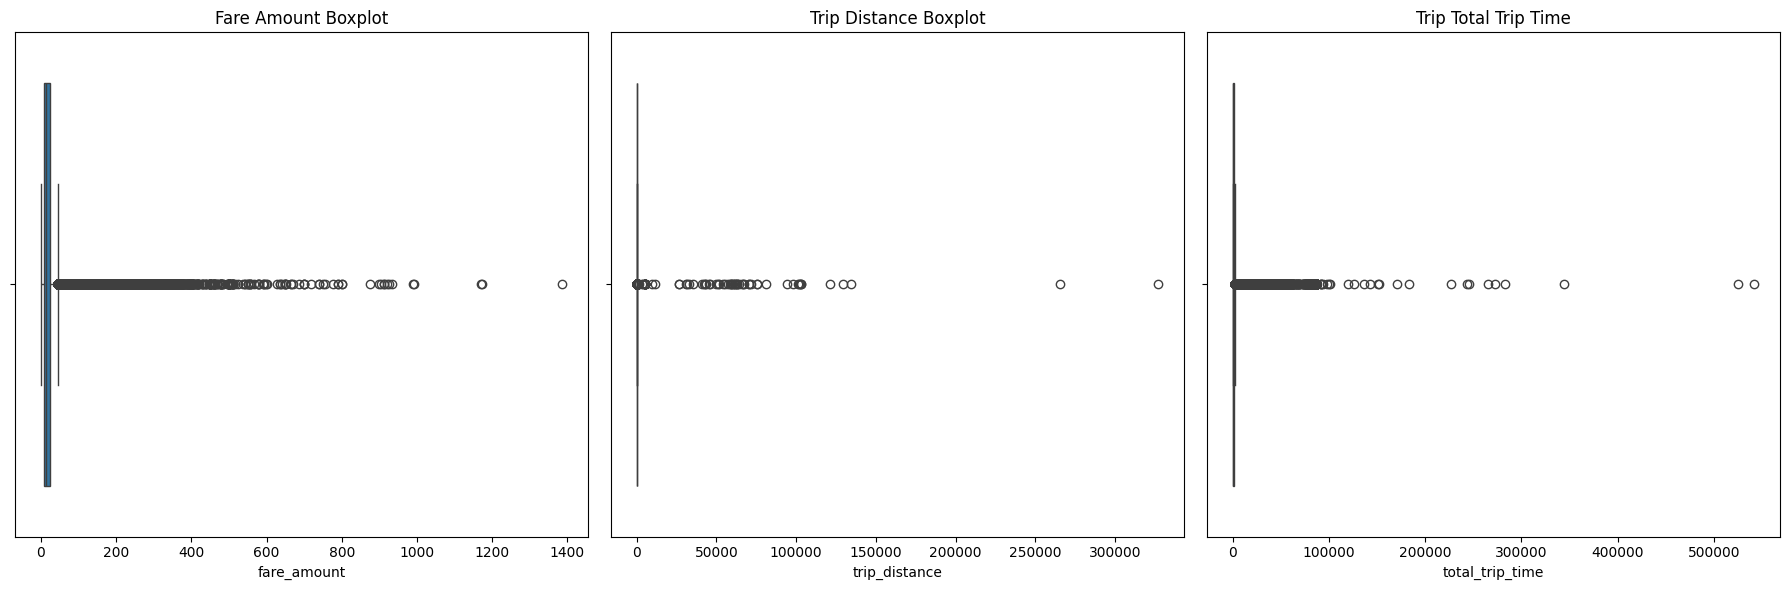

In [323]:
#boxplot fare amount and trip distance
plt.figure(figsize=(18, 6))  # Adjusted figure size to accommodate 3 subplots

plt.subplot(1, 3, 1)  # Changed to 1 row, 3 columns, and subplot index 1
sns.boxplot(x=df['fare_amount'])
plt.title('Fare Amount Boxplot')

plt.subplot(1, 3, 2)  # Changed to 1 row, 3 columns, and subplot index 2
sns.boxplot(x=df['trip_distance'])
plt.title('Trip Distance Boxplot')

plt.subplot(1, 3, 3)  # Changed to 1 row, 3 columns, and subplot index 3
sns.boxplot(x=df['total_trip_time'])
plt.title('Trip Total Trip Time')

plt.tight_layout()
plt.show()

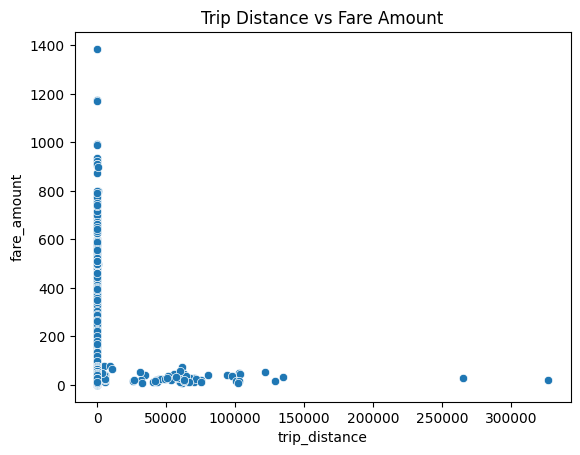

In [324]:
#Trip distance and Fare Amount
sns.scatterplot(data=df, x='trip_distance', y='fare_amount')
plt.title('Trip Distance vs Fare Amount')
plt.show()


**Normalize using Log Transformation**

In [325]:
df['trip_distance_log'] = np.log(df['trip_distance'])
df['fare_amount_log'] = np.log(df['fare_amount'])
df['total_trip_time_log'] = np.log(df['total_trip_time'])

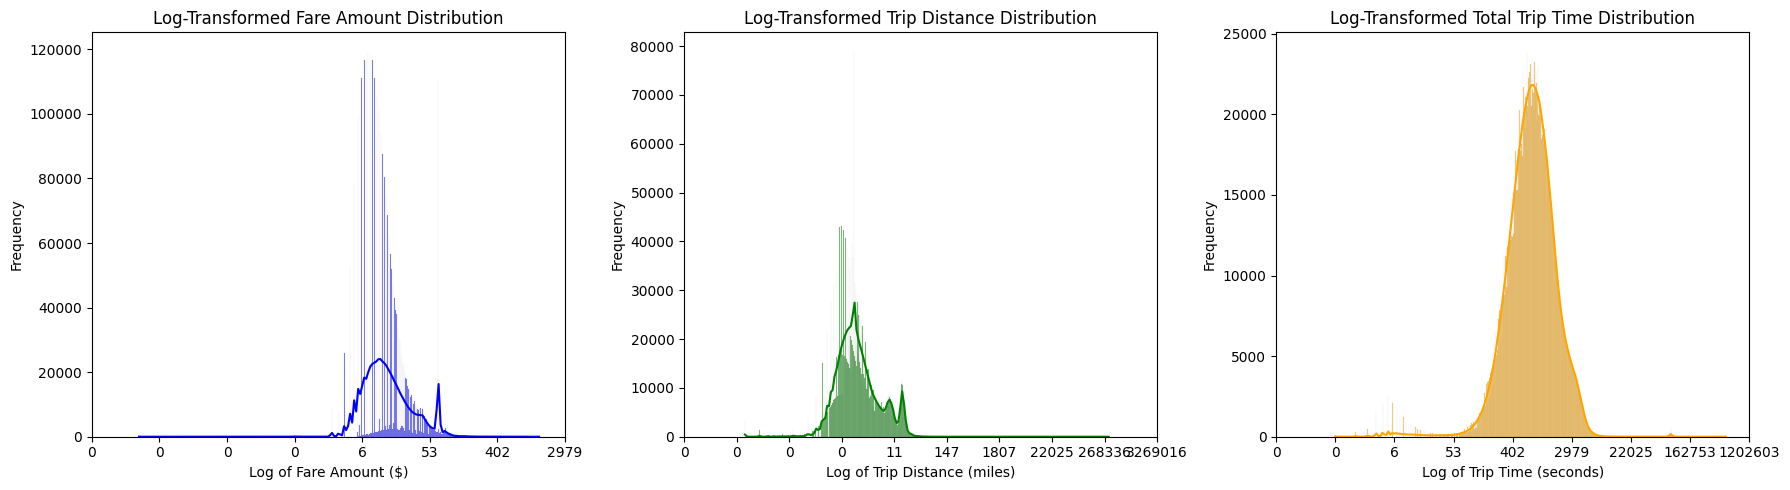

In [326]:
plt.figure(figsize=(18, 5))

# Plot the log-transformed 'Total Amount'
plt.subplot(1, 3, 1)
sns.histplot(df['fare_amount_log'], kde=True, color='blue')
plt.title('Log-Transformed Fare Amount Distribution')
plt.xlabel('Log of Fare Amount ($)')
plt.ylabel('Frequency')

# Adjusting x-axis to show original scale
ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'{int(np.expm1(tick))}' for tick in ticks])

# Plot the log-transformed 'Trip Distance'
plt.subplot(1, 3, 2)
sns.histplot(df['trip_distance_log'], kde=True, color='green')
plt.title('Log-Transformed Trip Distance Distribution')
plt.xlabel('Log of Trip Distance (miles)')
plt.ylabel('Frequency')

ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'{int(np.expm1(tick))}' for tick in ticks])

# Plot the log-transformed 'Total Trip Time'
plt.subplot(1, 3, 3)
sns.histplot(df['total_trip_time_log'], kde=True, color='orange')
plt.title('Log-Transformed Total Trip Time Distribution')
plt.xlabel('Log of Trip Time (seconds)')
plt.ylabel('Frequency')

ax = plt.gca()
ticks = ax.get_xticks()
ax.set_xticks(ticks)
ax.set_xticklabels([f'{int(np.expm1(tick))}' for tick in ticks])

plt.tight_layout()
plt.show()

In [327]:
# Drop columns that don't contribute significantly to the model or have high multicollinearity
df = df.drop(columns=['trip_distance', 'fare_amount','total_trip_time' ])

# Verify the remaining columns
print(df.columns)

Index(['passenger_count', 'RatecodeID', 'PULocationID', 'DOLocationID',
       'payment_type', 'pickup_hour', 'pickup_dayofweek', 'dropoff_hour',
       'trip_distance_log', 'fare_amount_log', 'total_trip_time_log'],
      dtype='object')


**Checking for Multicollinearity**

In [328]:
# Calculate correlation matrix for numerical features
df.corr()

,passenger_count,RatecodeID,PULocationID,DOLocationID,payment_type,pickup_hour,pickup_dayofweek,dropoff_hour,trip_distance_log,fare_amount_log,total_trip_time_log
passenger_count,1.00,-0.05,-0.01,-0.01,0.07,0.03,0.05,0.03,0.05,0.07,0.03
RatecodeID,-0.05,1.00,-0.08,-0.07,-0.05,-0.07,-0.03,-0.05,0.13,0.14,0.17
PULocationID,-0.01,-0.08,1.00,0.07,-0.01,0.01,-0.03,0.01,-0.14,-0.14,-0.10
DOLocationID,-0.01,-0.07,0.07,1.00,-0.02,0.03,-0.03,0.03,-0.10,-0.11,-0.09
payment_type,0.07,-0.05,-0.01,-0.02,1.00,-0.01,-0.00,-0.01,-0.04,-0.03,-0.04
pickup_hour,0.03,-0.07,0.01,0.03,-0.01,1.00,-0.07,0.93,-0.02,-0.00,0.03
pickup_dayofweek,0.05,-0.03,-0.03,-0.03,-0.00,-0.07,1.00,-0.08,0.02,0.01,-0.02
dropoff_hour,0.03,-0.05,0.01,0.03,-0.01,0.93,-0.08,1.00,-0.03,-0.00,0.04
trip_distance_log,0.05,0.13,-0.14,-0.10,-0.04,-0.02,0.02,-0.03,1.00,0.87,0.76
fare_amount_log,0.07,0.14,-0.14,-0.11,-0.03,-0.00,0.01,-0.00,0.87,1.00,0.74


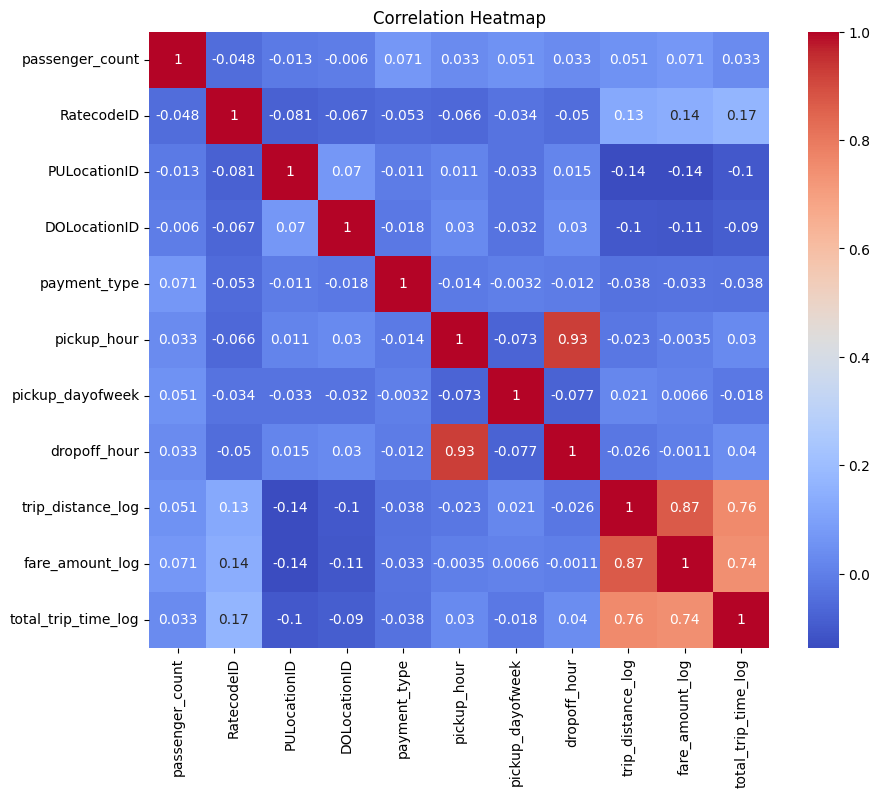

In [329]:
#correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [330]:
df.shape

(2864936, 11)

In [331]:
#drop column dropoff_hour
df = df.drop(columns=['dropoff_hour'])

**Modelling**

In [332]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import StandardScaler

# Split the data
X = df.drop('fare_amount_log', axis=1)  # Features
y = df['fare_amount_log']  # Target variable

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale using only training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [333]:

#  Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# 4. Predict using scaled test data
y_pred = model.predict(X_test_scaled)


# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R-squared: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.4f}")

Mean Squared Error: 0.1165
R-squared: 0.7702
Mean Absolute Error: 0.1695


In [334]:
# Save model in pickle file and scaler file

import pickle

pickle.dump(model, open('fare_model.pkl', 'wb'))

pickle.dump(scaler, open('scaler.pkl', 'wb'))

